In [13]:
!pip install cartopy
import cartopy
!pip install herbie-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.4 MB/s eta 0:00:00


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import herbie

lcc_proj = ccrs.LambertConformal(central_longitude=-95,
                             central_latitude=35,
                             standard_parallels=[35])

pc_proj = ccrs.PlateCarree()

def synoptic_view():

    date=input('Date and Time? yyyy-mm-dd hh:mm')

    hour=int(input('Forecast hour?'))

    print(date)

    data=herbie.Herbie(date,model='gfs',product='pgrb2.0p25',fxx=hour)

    u250=data.xarray(':UGRD:250') #u wind at 250mb

    v250=data.xarray(':VGRD:250') #v wind at 250mb

    u250lon=u250['longitude'].values

    v250lat=v250['latitude'].values

    u250wind=u250['u'].values

    v250wind=v250['v'].values

    mag250=np.sqrt(u250wind**2 + v250wind**2) #magnitude of 250mb winds

    val = u250['valid_time'].dt.strftime('%Y-%m-%d %H00').values

    ini = u250['time'].dt.strftime('%Y-%m-%d %H00').values

    h250=data.xarray(':HGT:250') #geopotential heights at 250mb

    h250lon=h250['longitude'].values

    h250lat=h250['latitude'].values

    h250_values=h250['gh'].values

    mslp=data.xarray(':PRMSL:mean sea level')

    mslp_lon = mslp['longitude'].values

    mslp_lat = mslp['latitude'].values

    mslp_values=mslp['prmsl'].values

    fig, ax = plt.subplots(figsize=(20, 17), subplot_kw={'projection': lcc_proj})

    ax.add_feature(cfeature.LAND.with_scale('50m'))

    ax.add_feature(cfeature.OCEAN.with_scale('50m'))

    ax.add_feature(cfeature.LAKES.with_scale('50m'))

    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

    ax.add_feature(cfeature.STATES.with_scale('50m'))

    ax.add_feature(cfeature.BORDERS.with_scale('50m'))

    ax.set_extent((-120, -73, 23, 50))

    jet_range=[30,80]

    levels = np.linspace(jet_range[0], jet_range[1], 50)

    p250=ax.contourf(u250lon, v250lat, mag250,transform=pc_proj, levels=levels, cmap='jet',zorder=3,alpha=.5)

    ax.contour(h250lon, h250lat, h250_values, transform=pc_proj, levels=30, colors='black',zorder=2)

    cbar250 = plt.colorbar(p250, ax=ax, orientation='horizontal',pad=.07)

    cbar250.set_label("250 mb wind speeds (kt)",fontsize=20)

    ax.contour(mslp_lon, mslp_lat, mslp_values, transform=pc_proj, levels=30, colors='red',zorder=1)

    plt.title(f"GFS Surface Pressure, 250mb Geopotential Heights and Wind Speed\nInitialized: {ini}\nValid: {val}", fontsize=20)

    plt.tight_layout()

    plt.show()




 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ INFO: Created a default config file.                 │
 │ You may view/edit Herbie's configuration here:       │
 │          /root/.config/herbie/config.toml            │
 ╰──────────────────────────────────────────────────────╯



Date and Time? yyyy-mm-dd hh:mm2024-04-09 12:00
Forecast hour?00
2024-04-09 12:00
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Apr-09 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/root/data/gfs/20240409]


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://nat

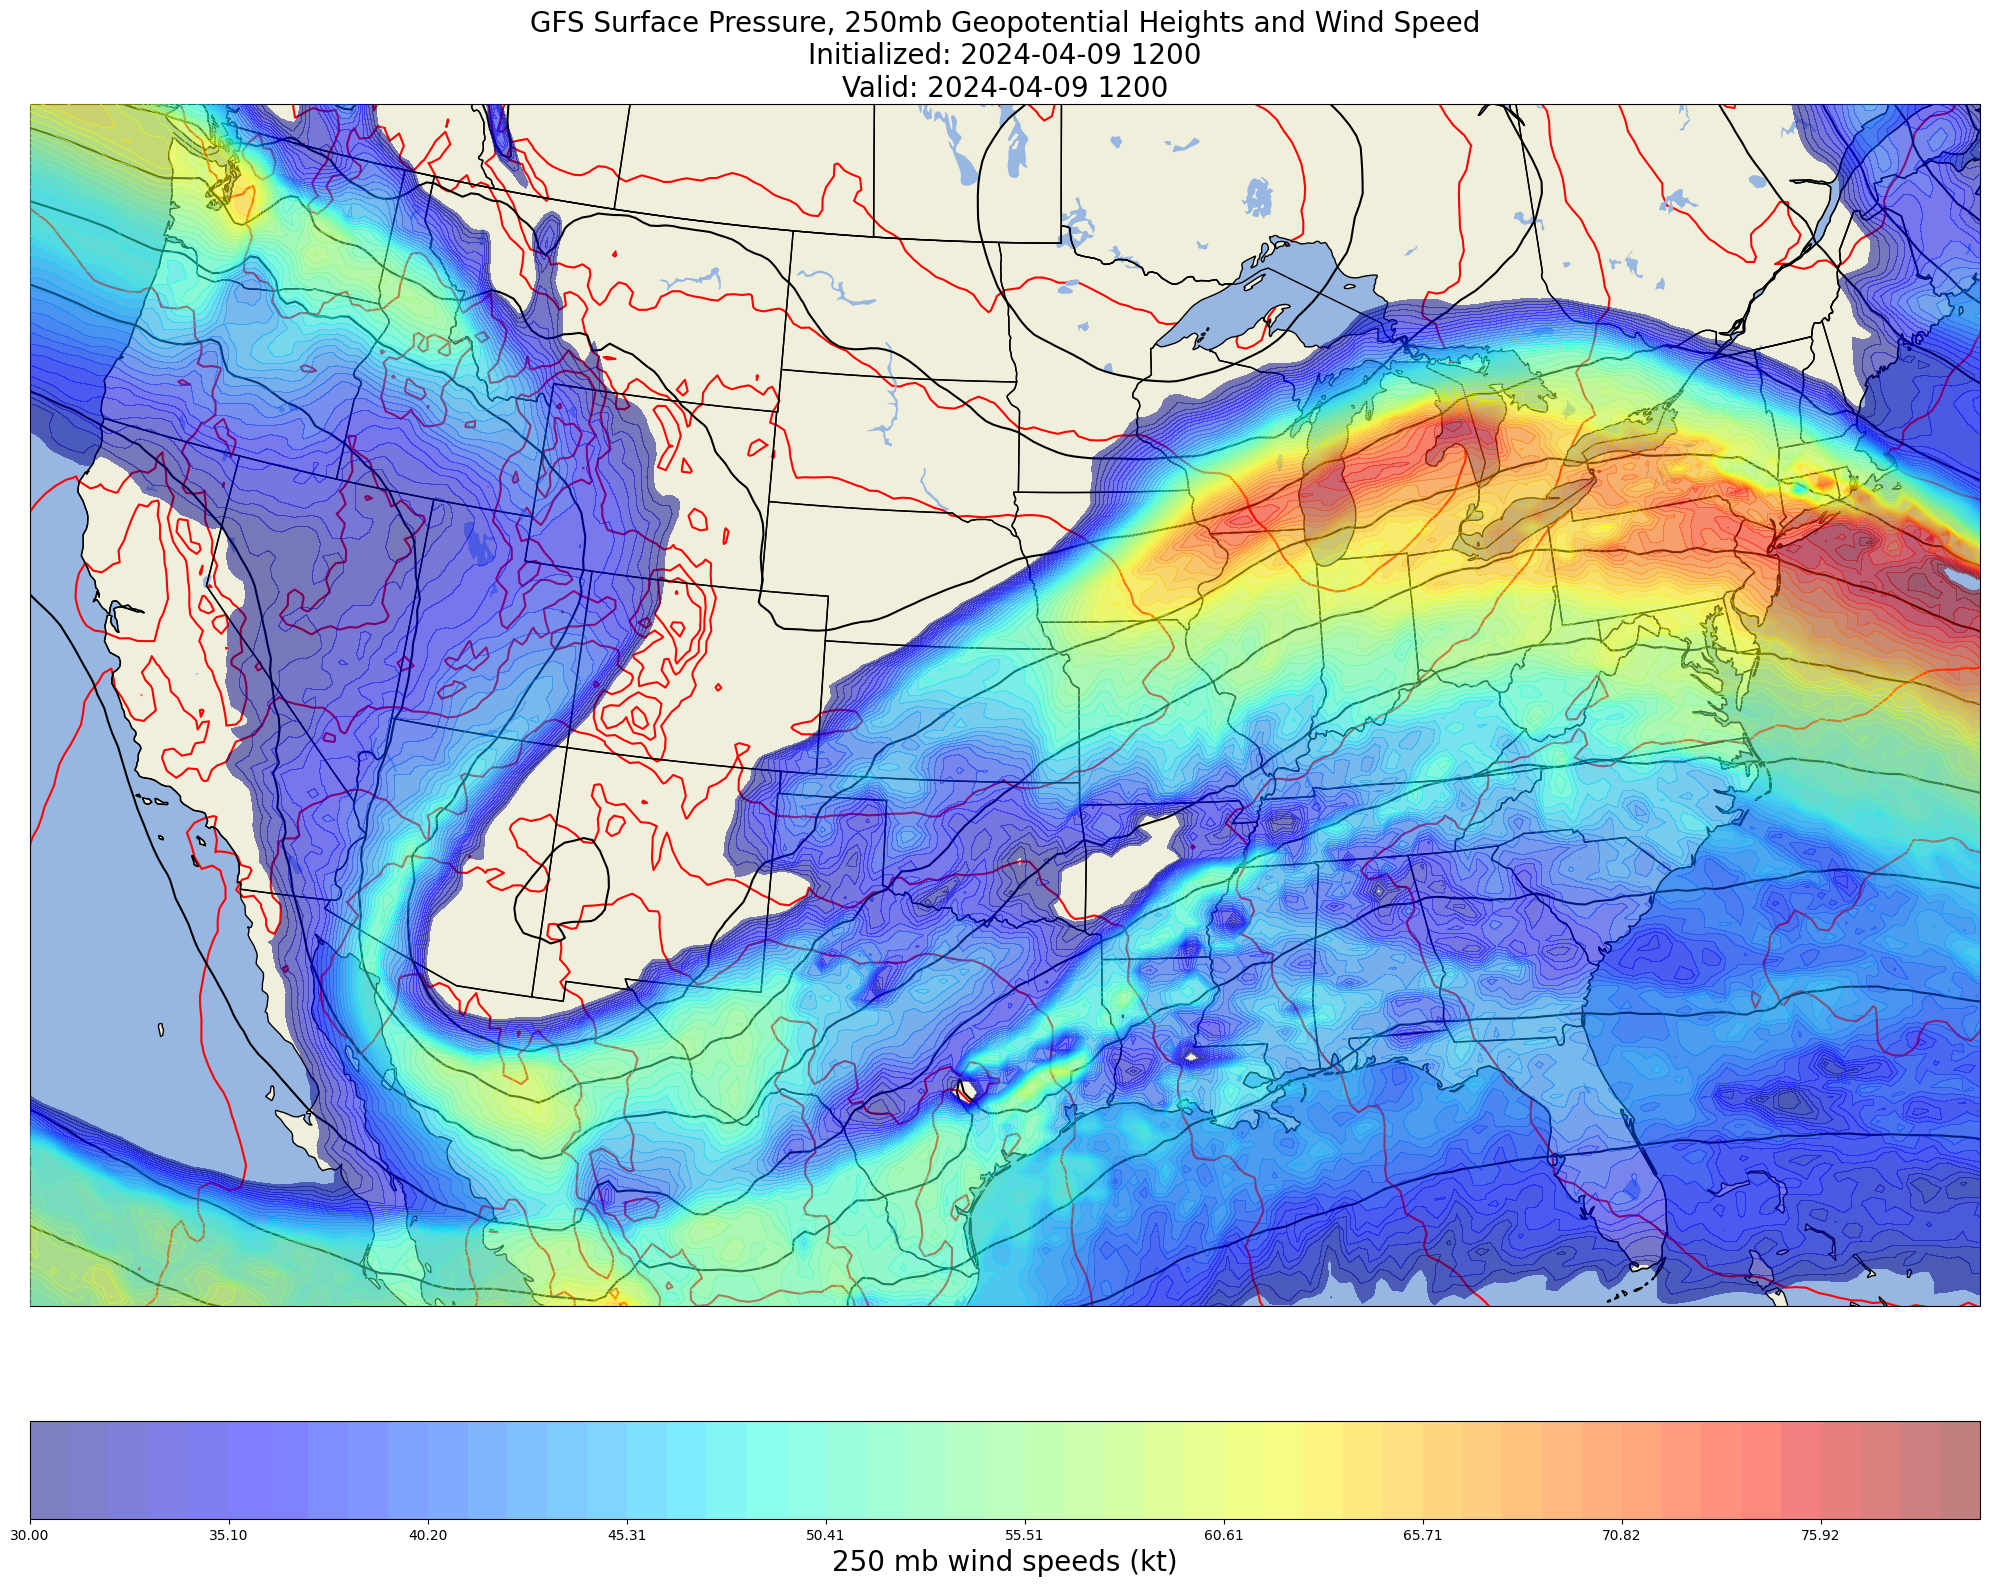

In [16]:
synoptic_view()